# Data Wrangling + EDA

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc
from math import pi
%matplotlib inline

In [2]:
# Import Austin Animal Center intakes and outcomes 
aac_df = pd.read_csv("aac_intakes_outcomes.csv")

print(aac_df.shape)
aac_df.head()

(79672, 41)


,age_upon_outcome,animal_id_outcome,date_of_birth,outcome_subtype,outcome_type,sex_upon_outcome,age_upon_outcome_(days),age_upon_outcome_(years),age_upon_outcome_age_group,outcome_datetime,...,age_upon_intake_age_group,intake_datetime,intake_month,intake_year,intake_monthyear,intake_weekday,intake_hour,intake_number,time_in_shelter,time_in_shelter_days
0,10 years,A006100,2007-07-09 00:00:00,NaN,Return to Owner,Neutered Male,3650,10.0,"(7.5, 10.0]",2017-12-07 14:07:00,...,"(7.5, 10.0]",2017-12-07 00:00:00,12,2017,2017-12,Thursday,14,1.0,0 days 14:07:00.000000000,0.588194
1,7 years,A006100,2007-07-09 00:00:00,NaN,Return to Owner,Neutered Male,2555,7.0,"(5.0, 7.5]",2014-12-20 16:35:00,...,"(5.0, 7.5]",2014-12-19 10:21:00,12,2014,2014-12,Friday,10,2.0,1 days 06:14:00.000000000,1.259722
2,6 years,A006100,2007-07-09 00:00:00,NaN,Return to Owner,Neutered Male,2190,6.0,"(5.0, 7.5]",2014-03-08 17:10:00,...,"(5.0, 7.5]",2014-03-07 14:26:00,3,2014,2014-03,Friday,14,3.0,1 days 02:44:00.000000000,1.113889
3,10 years,A047759,2004-04-02 00:00:00,Partner,Transfer,Neutered Male,3650,10.0,"(7.5, 10.0]",2014-04-07 15:12:00,...,"(7.5, 10.0]",2014-04-02 15:55:00,4,2014,2014-04,Wednesday,15,1.0,4 days 23:17:00.000000000,4.970139
4,16 years,A134067,1997-10-16 00:00:00,NaN,Return to Owner,Neutered Male,5840,16.0,"(15.0, 17.5]",2013-11-16 11:54:00,...,"(15.0, 17.5]",2013-11-16 09:02:00,11,2013,2013-11,Saturday,9,1.0,0 days 02:52:00.000000000,0.119444


In [3]:
# check for unmatching animal ids
aac_df[aac_df['animal_id_outcome'] != aac_df['animal_id_intake']].shape

# remove duplicate id column
aac_df.rename(columns={"animal_id_outcome": "animal_id"}, inplace=True)
aac_df.drop(columns=['animal_id_intake'], inplace=True)
aac_df.head()

,age_upon_outcome,animal_id,date_of_birth,outcome_subtype,outcome_type,sex_upon_outcome,age_upon_outcome_(days),age_upon_outcome_(years),age_upon_outcome_age_group,outcome_datetime,...,age_upon_intake_age_group,intake_datetime,intake_month,intake_year,intake_monthyear,intake_weekday,intake_hour,intake_number,time_in_shelter,time_in_shelter_days
0,10 years,A006100,2007-07-09 00:00:00,NaN,Return to Owner,Neutered Male,3650,10.0,"(7.5, 10.0]",2017-12-07 14:07:00,...,"(7.5, 10.0]",2017-12-07 00:00:00,12,2017,2017-12,Thursday,14,1.0,0 days 14:07:00.000000000,0.588194
1,7 years,A006100,2007-07-09 00:00:00,NaN,Return to Owner,Neutered Male,2555,7.0,"(5.0, 7.5]",2014-12-20 16:35:00,...,"(5.0, 7.5]",2014-12-19 10:21:00,12,2014,2014-12,Friday,10,2.0,1 days 06:14:00.000000000,1.259722
2,6 years,A006100,2007-07-09 00:00:00,NaN,Return to Owner,Neutered Male,2190,6.0,"(5.0, 7.5]",2014-03-08 17:10:00,...,"(5.0, 7.5]",2014-03-07 14:26:00,3,2014,2014-03,Friday,14,3.0,1 days 02:44:00.000000000,1.113889
3,10 years,A047759,2004-04-02 00:00:00,Partner,Transfer,Neutered Male,3650,10.0,"(7.5, 10.0]",2014-04-07 15:12:00,...,"(7.5, 10.0]",2014-04-02 15:55:00,4,2014,2014-04,Wednesday,15,1.0,4 days 23:17:00.000000000,4.970139
4,16 years,A134067,1997-10-16 00:00:00,NaN,Return to Owner,Neutered Male,5840,16.0,"(15.0, 17.5]",2013-11-16 11:54:00,...,"(15.0, 17.5]",2013-11-16 09:02:00,11,2013,2013-11,Saturday,9,1.0,0 days 02:52:00.000000000,0.119444


## Animal Type

It is initially planned to focus only on adoption data about cats and dogs. 

Should we include other types of animals? What types of animals can be found in the shelter?

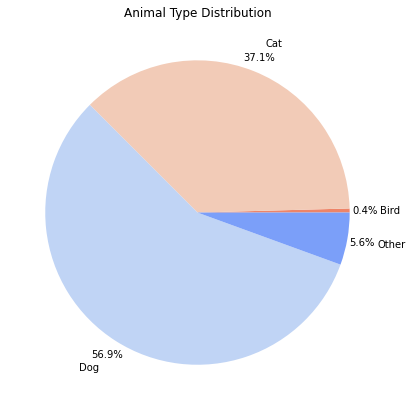

In [4]:
#plt.style.use('seaborn-pastel')

atc_df = aac_df.groupby(['animal_type'])[['count']].sum()
plt.figure(figsize=(7,7))
plt.pie(atc_df['count'], labels=atc_df.index, colors=sns.color_palette("coolwarm_r",len(atc_df.index)), autopct='%1.1f%%', pctdistance=1.1, labeldistance=1.2)
p = plt.gcf()
plt.title('Animal Type Distribution');
plt.show()

What types of animals can be found in cathegory "Other"? What are their outcomes?

In [5]:
other_df = aac_df[aac_df['animal_type']=='Other']
other_type_df = other_df.groupby(['breed'])[['count']].sum().reset_index().sort_values(by='count', ascending=False).head(12)
other_outcome_df = other_df.groupby(['outcome_type'])[['count']].sum().reset_index().sort_values(by='count', ascending=False)

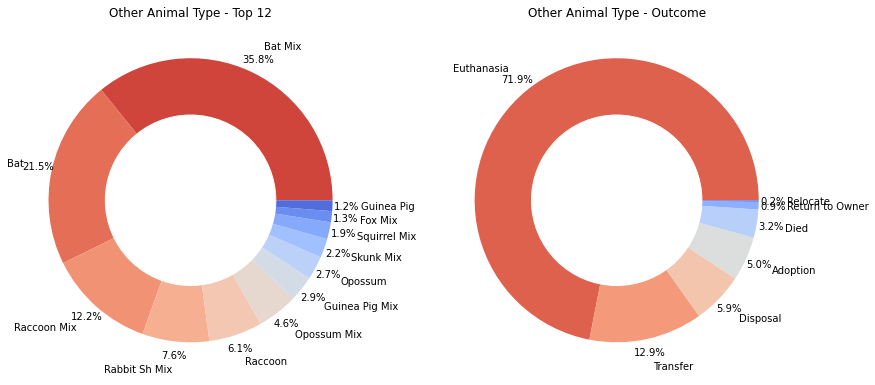

In [6]:
fig = plt.figure(figsize=(14,7))

plt.subplot(121)
ax = plt.pie(other_type_df['count'], colors=sns.color_palette("coolwarm_r",len(other_type_df.index)), labels=other_type_df['breed'], autopct='%1.1f%%', pctdistance=1.1, labeldistance=1.2)  # Create a pieplot
my_circle = plt.Circle( (0,0), 0.6, color='white') # add a circle at the center
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Other Animal Type - Top 12');

plt.subplot(122)
ax = plt.pie(other_outcome_df['count'], colors=sns.color_palette("coolwarm_r",len(other_outcome_df.index)), labels=other_outcome_df['outcome_type'], autopct='%1.1f%%', pctdistance=1.1, labeldistance=1.2)
my_circle = plt.Circle( (0,0), 0.6, color='white') # add a circle at the center
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Other Animal Type - Outcome');

fig.set_facecolor('w')

With this analysis we can conclude that most of the most of the "Other" animals are in fact wild animals and likely admitted to the shelter because of an injury, sickness or poor health state in general, and were mostly euthanized, and adopted only in small portion. 

Thus, we are going to follow the initial plan and focus only on data regarding cats and dogs.

In [7]:
#leave only information about cats and dogs - our target group
aac_df = aac_df[(aac_df['animal_type'] == 'Dog') | (aac_df['animal_type'] == 'Cat')]

print(aac_df.shape)
aac_df.head()

(74905, 40)


,age_upon_outcome,animal_id,date_of_birth,outcome_subtype,outcome_type,sex_upon_outcome,age_upon_outcome_(days),age_upon_outcome_(years),age_upon_outcome_age_group,outcome_datetime,...,age_upon_intake_age_group,intake_datetime,intake_month,intake_year,intake_monthyear,intake_weekday,intake_hour,intake_number,time_in_shelter,time_in_shelter_days
0,10 years,A006100,2007-07-09 00:00:00,NaN,Return to Owner,Neutered Male,3650,10.0,"(7.5, 10.0]",2017-12-07 14:07:00,...,"(7.5, 10.0]",2017-12-07 00:00:00,12,2017,2017-12,Thursday,14,1.0,0 days 14:07:00.000000000,0.588194
1,7 years,A006100,2007-07-09 00:00:00,NaN,Return to Owner,Neutered Male,2555,7.0,"(5.0, 7.5]",2014-12-20 16:35:00,...,"(5.0, 7.5]",2014-12-19 10:21:00,12,2014,2014-12,Friday,10,2.0,1 days 06:14:00.000000000,1.259722
2,6 years,A006100,2007-07-09 00:00:00,NaN,Return to Owner,Neutered Male,2190,6.0,"(5.0, 7.5]",2014-03-08 17:10:00,...,"(5.0, 7.5]",2014-03-07 14:26:00,3,2014,2014-03,Friday,14,3.0,1 days 02:44:00.000000000,1.113889
3,10 years,A047759,2004-04-02 00:00:00,Partner,Transfer,Neutered Male,3650,10.0,"(7.5, 10.0]",2014-04-07 15:12:00,...,"(7.5, 10.0]",2014-04-02 15:55:00,4,2014,2014-04,Wednesday,15,1.0,4 days 23:17:00.000000000,4.970139
4,16 years,A134067,1997-10-16 00:00:00,NaN,Return to Owner,Neutered Male,5840,16.0,"(15.0, 17.5]",2013-11-16 11:54:00,...,"(15.0, 17.5]",2013-11-16 09:02:00,11,2013,2013-11,Saturday,9,1.0,0 days 02:52:00.000000000,0.119444


## Animal Age

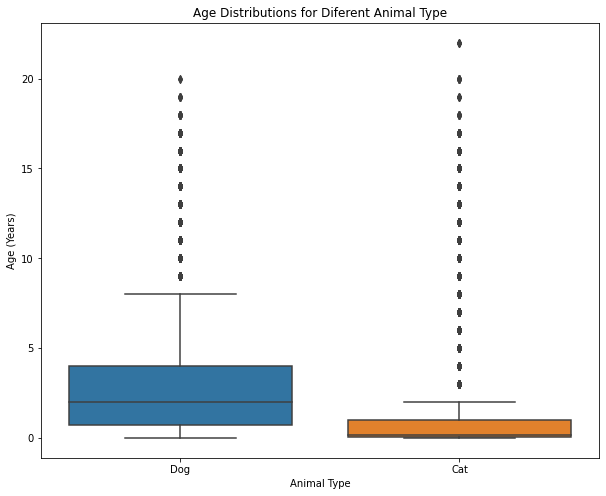

In [8]:
plt.figure(figsize=(10, 8))
sns.boxplot(x='animal_type', y='age_upon_intake_(years)', data=aac_df, orient='v')
plt.title('Age Distributions for Diferent Animal Type');
plt.xlabel('Animal Type')
plt.ylabel('Age (Years)')
plt.xticks()
plt.yticks();

,age_upon_intake_(years),age_upon_outcome_(years)
animal_type,,
Cat,1.370620,1.413077
Dog,2.680346,2.713164


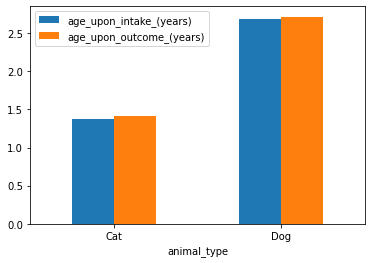

In [9]:
avg_age_df = aac_df.groupby(['animal_type'])[['age_upon_intake_(years)', 'age_upon_outcome_(years)']].mean()
ax = avg_age_df.plot.bar(rot=0)
avg_age_df.head()

We can see there is no significant difference in age of the animals that are coming in and out of the shelter.

In [10]:
print(len(aac_df[aac_df['age_upon_outcome_(days)'] == 0]))
aac_df = aac_df[aac_df['age_upon_outcome_(days)'] != 0]

79


Age upon outcome is the feature we want to predict, therefore we need to remove rows that do not contain this information or we know it is false (0)

Does an animal's age have impact on their length of stay in the shelter?

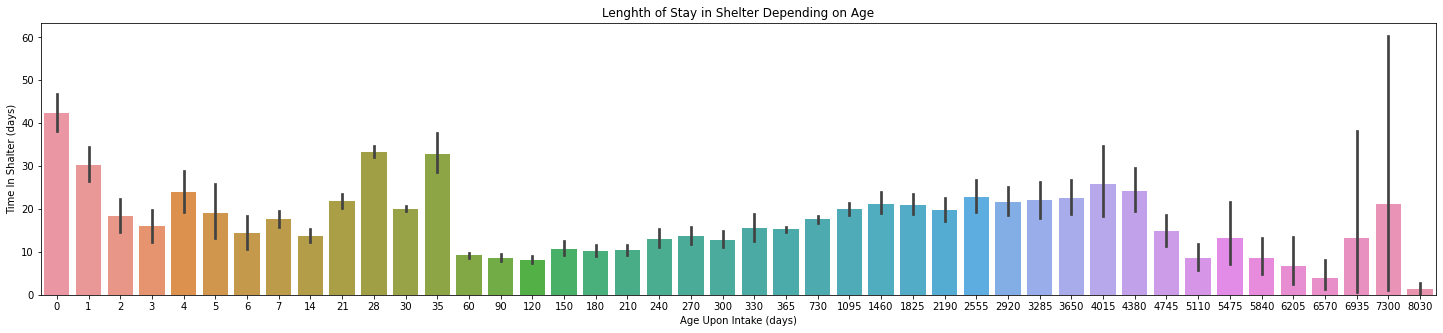

In [11]:
plt.figure(figsize=(25,5))
sns.barplot(x=aac_df['age_upon_intake_(days)'], y=aac_df['time_in_shelter_days'])
plt.title('Lenghth of Stay in Shelter Depending on Age');
plt.xlabel('Age Upon Intake (days)')
plt.ylabel('Time In Shalter (days)');

We can see that there is no correlation up until the age of two months, which can be explained by the fact that animals at this age are two young for adoption. For animals older than 2 months, we can see that, generally speaking, older animals tend to stay in the shelter for longer. 

If we filter this, and show only information about animals older than 2 months and were adopted, we can clearly see the correlation.

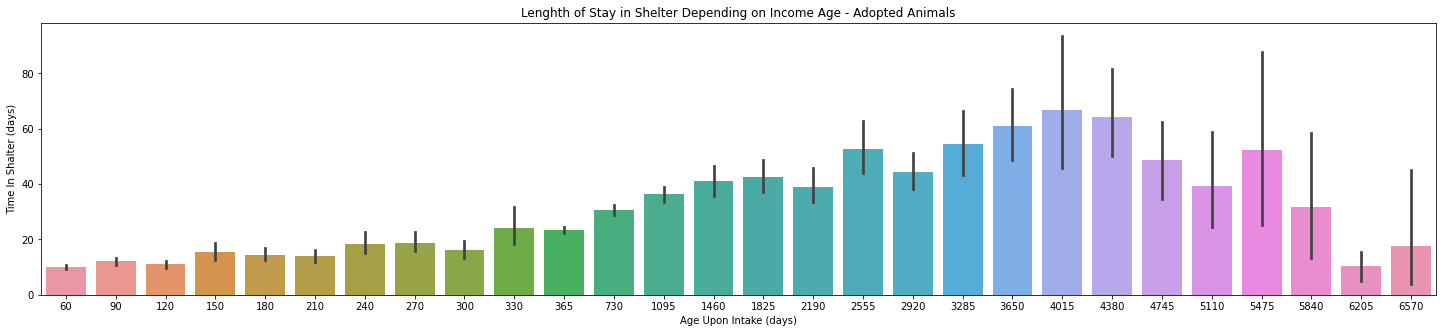

In [12]:
plt.figure(figsize=(25,5))
sns.barplot(x=aac_df[(aac_df['age_upon_intake_(days)'] >= 60)& (aac_df['outcome_type'] == 'Adoption')]['age_upon_intake_(days)'], y=aac_df[(aac_df['age_upon_intake_(days)'] >= 60)& (aac_df['outcome_type'] == 'Adoption')]['time_in_shelter_days'])
plt.title('Lenghth of Stay in Shelter Depending on Income Age - Adopted Animals');
plt.xlabel('Age Upon Intake (days)')
plt.ylabel('Time In Shalter (days)');

Create different age groups.

In [13]:
def categorise(row):  
    if row['age_upon_intake_(days)'] >= 0 and row['age_upon_intake_(days)'] < 60:
        return '0-1 months'
    elif row['age_upon_intake_(days)'] >= 60 and row['age_upon_intake_(days)'] < 180:
        return '2-5 months'
    elif row['age_upon_intake_(days)'] >= 180 and row['age_upon_intake_(days)'] < 365:
        return '6-11 months'
    elif row['age_upon_intake_(days)'] >= 365 and row['age_upon_intake_(days)'] < 1095:
        return '1-2 years'
    elif row['age_upon_intake_(days)'] >= 1095 and row['age_upon_intake_(days)'] < 2190:
        return '3-5 years'
    elif row['age_upon_intake_(days)'] >= 2190 and row['age_upon_intake_(days)'] <= 4015:
        return '6-10 years'
    elif row['age_upon_intake_(days)'] > 4015:
        return '10+ years'
    return '?'

In [14]:
aac_df['age_group'] = aac_df.apply(lambda row: categorise(row), axis=1)

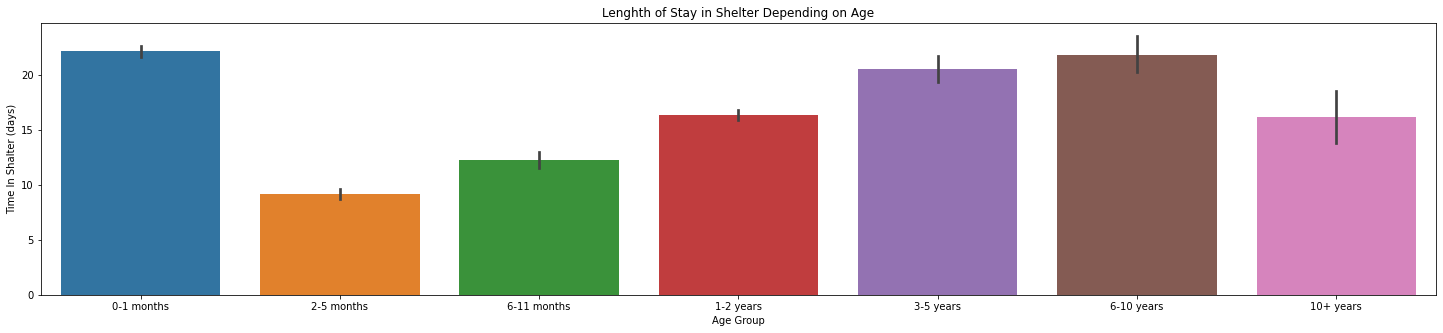

In [15]:
plt.figure(figsize=(25,5))
sns.barplot(x=aac_df.sort_values(by='age_upon_intake_(days)', ascending=True)['age_group'], y=aac_df['time_in_shelter_days'])
plt.title('Lenghth of Stay in Shelter Depending on Age');
plt.xlabel('Age Group')
plt.ylabel('Time In Shalter (days)');

There are different columns containing information about age of animals. In atempt to remove redundant information, we will:

remove columns "date_of_birth", "age_upon_intake", "age_upon_intake_(years)", "age_upon_outcome", "age_upon_outcome_(years)", "age_upon_outcome_age_group", "age_upon_intake_age_group", "time_in_shelter"

and leave columns "age_upon_intake_(days)", "age_upon_outcome_(days)", "time_in_shelter_days"

In [16]:
aac_df.drop(columns=["date_of_birth", "age_upon_intake", "age_upon_outcome", "age_upon_outcome_age_group", "age_upon_intake_age_group", "time_in_shelter"], inplace=True)

# columns "age_upon_intake_(years)" and "age_upon_outcome_(years)" are used in for ploting purposes below, so they will be removed later on.

# aac_df.drop(columns=["age_upon_intake_(years)", "age_upon_outcome_(years)"], inplace=True)

## Intake Condition

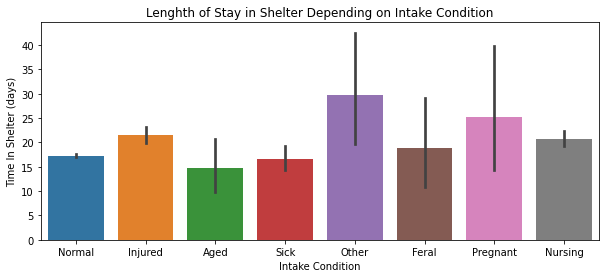

In [17]:
plt.figure(figsize=(10,4))
sns.barplot(x=aac_df['intake_condition'], y=aac_df['time_in_shelter_days'])
plt.title('Lenghth of Stay in Shelter Depending on Intake Condition');
plt.xlabel('Intake Condition')
plt.ylabel('Time In Shelter (days)');

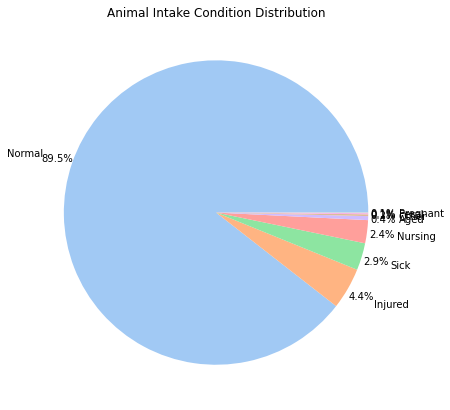

In [18]:
# grouping dataset by intake condition, counting, and sorting.
#plt.style.use('seaborn-pastel')

atc_df = aac_df.groupby(['intake_condition'])[['count']].sum().sort_values(by='count', ascending=False)
plt.figure(figsize=(7,7))
plt.pie(atc_df['count'], labels=atc_df.index, colors=sns.color_palette("pastel",len(atc_df.index)), autopct='%1.1f%%', pctdistance=1.1, labeldistance=1.2)
p = plt.gcf()
plt.title('Animal Intake Condition Distribution');
plt.show()

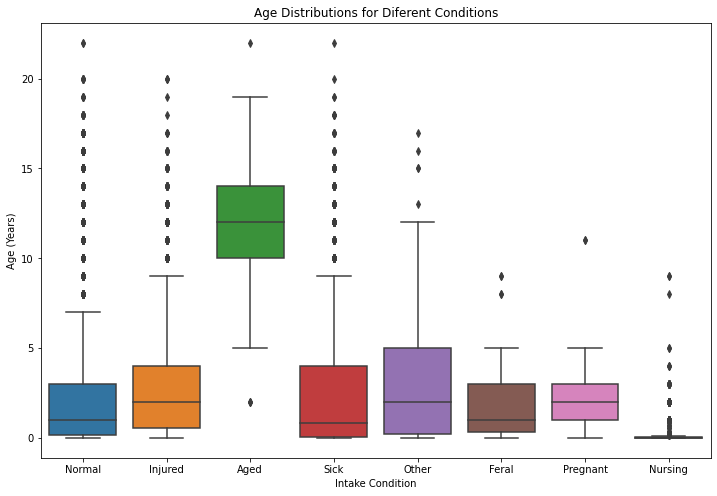

In [19]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='intake_condition', y='age_upon_intake_(years)', data=aac_df, orient='v')
plt.title('Age Distributions for Diferent Conditions')
plt.xlabel('Intake Condition')
plt.ylabel('Age (Years)')
plt.xticks()
plt.yticks();

In [20]:
print(len(aac_df[(aac_df['intake_condition'] == 'Aged') & (aac_df['age_upon_intake_(years)'] < 3)]))

3


We can see there are 3 "Aged" animals that are younger than 3 years old. These are likely outliers, and we are going to remove them from the dataset.

In [21]:
aac_df = aac_df[(aac_df['intake_condition'] != 'Aged') | (aac_df['age_upon_intake_(years)'] >= 3)]

print(aac_df.shape)

(74823, 35)


## Intake Type

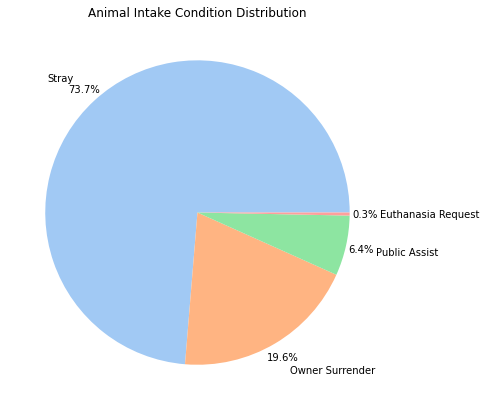

In [22]:
atc_df = aac_df.groupby(['intake_type'])[['count']].sum().sort_values(by='count', ascending=False)
plt.figure(figsize=(7,7))
plt.pie(atc_df['count'], labels=atc_df.index, colors=sns.color_palette("pastel",len(atc_df.index)), autopct='%1.1f%%', pctdistance=1.1, labeldistance=1.2)
p = plt.gcf()
plt.title('Animal Intake Condition Distribution');
plt.show()

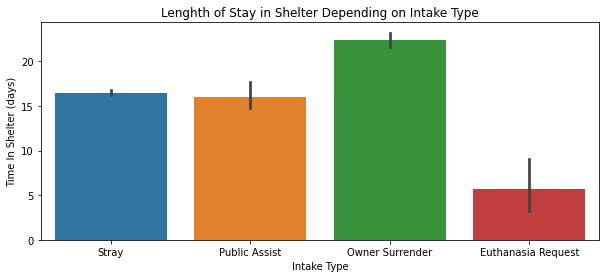

In [23]:
plt.figure(figsize=(10,4))
sns.barplot(x=aac_df['intake_type'], y=aac_df['time_in_shelter_days'])
plt.title('Lenghth of Stay in Shelter Depending on Intake Type');
plt.xlabel('Intake Type')
plt.ylabel('Time In Shelter (days)');

Animals that were surrended in the animal shelter with euthanasia request tend to stay in the shelter shorter. We want to check if that is because they have indeed been euthanized.

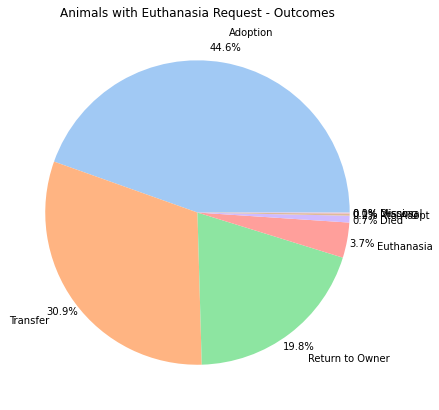

In [24]:
er_df = aac_df[aac_df['intake_type'] != 'Euthanasia Request']
ero_df = er_df.groupby(['outcome_type'])[['count']].sum().sort_values(by='count', ascending=False)
plt.figure(figsize=(7,7))
plt.pie(ero_df['count'], labels=ero_df.index, colors=sns.color_palette("pastel",len(ero_df.index)), autopct='%1.1f%%', pctdistance=1.1, labeldistance=1.2)
p = plt.gcf()
plt.title('Animals with Euthanasia Request - Outcomes');
plt.show()

Animals that were surrended in the animal shelter with euthanasia request were adopted in large portion, and only 3.7% were actually euthanized.

,age_upon_intake_(years),age_upon_outcome_(years)
intake_type,,
Euthanasia Request,8.323436,8.333425
Owner Surrender,2.686891,2.720740
Public Assist,3.419925,3.451527
Stray,1.892271,1.930232


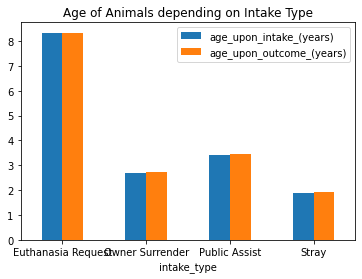

In [26]:
avg_age_df = aac_df.groupby(['intake_type'])[['age_upon_intake_(years)', 'age_upon_outcome_(years)']].mean()
ax = avg_age_df.plot.bar(rot=0, title="Age of Animals depending on Intake Type")
avg_age_df.head()

## Outcome type and subtype

### Outcome type

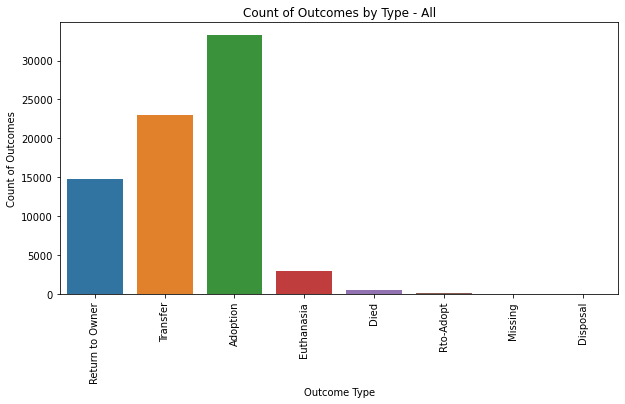

In [50]:
plt.figure(figsize=(10, 5))
sns.countplot(x='outcome_type', data=aac_df, orient='v')
plt.title('Count of Outcomes by Type - All')
plt.xlabel('Outcome Type')
plt.ylabel('Count of Outcomes')
plt.xticks(rotation='vertical')
plt.yticks();

In [40]:
dog_outcome_df = aac_df[aac_df['animal_type'] == 'Dog'].groupby(['outcome_type'])[['count']].sum().reset_index().sort_values(by='outcome_type', ascending=False)
cat_outcome_df = aac_df[aac_df['animal_type'] == 'Cat'].groupby(['outcome_type'])[['count']].sum().reset_index().sort_values(by='outcome_type', ascending=False)

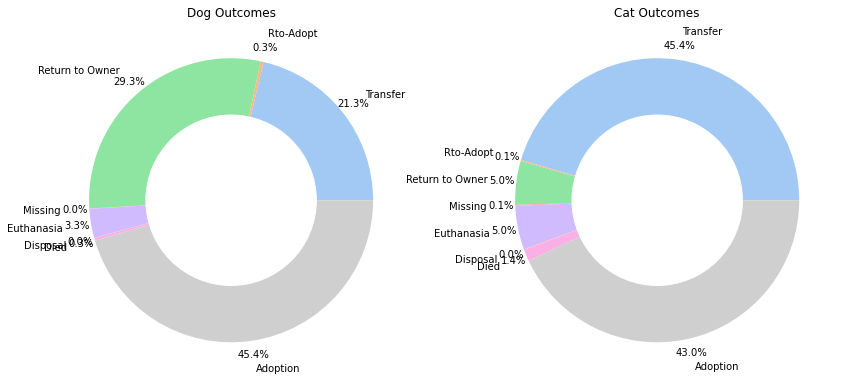

In [44]:
fig = plt.figure(figsize=(14,7))

plt.subplot(121)
ax = plt.pie(dog_outcome_df['count'], colors=sns.color_palette("pastel",len(dog_outcome_df.index)), labels=dog_outcome_df['outcome_type'], autopct='%1.1f%%', pctdistance=1.1, labeldistance=1.2)  # Create a pieplot
my_circle = plt.Circle( (0,0), 0.6, color='white') # add a circle at the center
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Dog Outcomes');

plt.subplot(122)
ax = plt.pie(cat_outcome_df['count'], colors=sns.color_palette("pastel",len(cat_outcome_df.index)), labels=cat_outcome_df['outcome_type'], autopct='%1.1f%%', pctdistance=1.1, labeldistance=1.2)
my_circle = plt.Circle( (0,0), 0.6, color='white') # add a circle at the center
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Cat Outcomes');

fig.set_facecolor('w')

Adoption rates for cats and dogs are similar, dogs are much more likely to be returned to the owner.

### Outcome subtype

By manually examining the dataset, we have noticed common pairs in "outcome_type" and "outcome_subtype" columns, such as "Transfer" - "Partner", "Adoption" - "Foster" and "Euthanasia" - "Suffering".

We want to check if these columns always go in the same pairs (if subtype is always dictated by type column).

In [51]:
outcome_types_df = aac_df.groupby(['outcome_type', 'outcome_subtype'])[['count']].sum()
outcome_types_df

count
outcome_type    outcome_subtype           
Adoption        Barn                     1
                Foster                5453
                Offsite                347
Died            At Vet                  32
                Enroute                 21
                In Foster              152
                In Kennel              294
                In Surgery              16
Euthanasia      Aggressive             496
                At Vet                  35
                Behavior               133
                Court/Investigation     23
                Medical                118
                Rabies Risk            149
                Suffering             2002
                Underage                 1
Missing         In Foster               18
                In Kennel                8
                Possible Theft           9
Return to Owner At Vet                   1
Transfer        Barn                     2
                Partner              19107
                SCRP                  3203
                Snr                    752

In [52]:
aac_df['outcome_subtype'].isnull().sum()

42450

We can see there are different subtypes for each outcome type, so outcome type does not automatically determine the subtype, but since more than a half rows are missing data about outcome subtype, this column will be removed from the dataset.

In [53]:
aac_df.drop(columns=['outcome_subtype'], inplace=True)

## Number of intakes

In [55]:
print(len(aac_df[aac_df['intake_number'] != aac_df['outcome_number']]))

0


Since intake and outake numbers are the same in each row, we will remove the duplicated column.

In [56]:
aac_df.drop(columns=['outcome_number'], inplace=True)

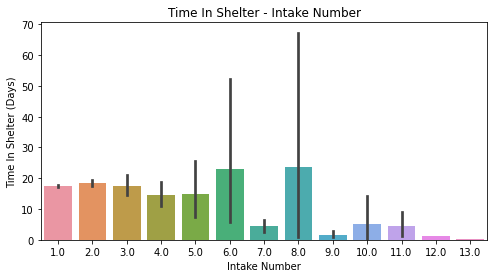

In [63]:
plt.figure(figsize=(8,4))
sns.barplot(x=aac_df['intake_number'], y=aac_df['time_in_shelter_days'])
plt.title('Time In Shelter - Intake Number');
plt.xlabel('Intake Number')
plt.ylabel('Time In Shelter (Days)');

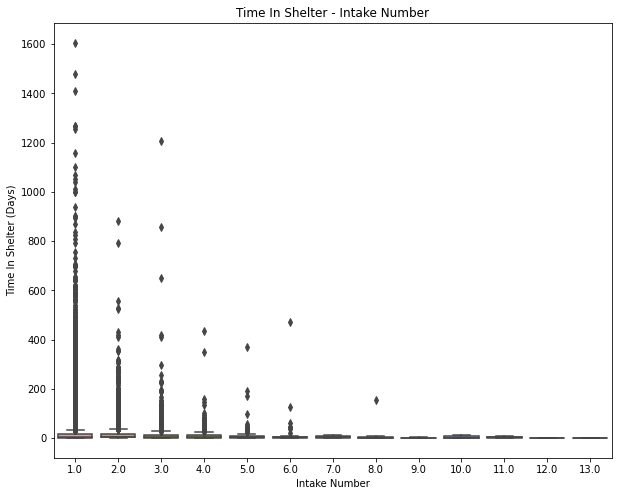

In [64]:
plt.figure(figsize=(10, 8))
sns.boxplot(x='intake_number', y='time_in_shelter_days', data=aac_df, orient='v')
plt.title('time in shelter');
plt.title('Time In Shelter - Intake Number');
plt.xlabel('Intake Number')
plt.ylabel('Time In Shelter (Days)')
plt.xticks()
plt.yticks();

In [66]:
aac_df.groupby(['intake_number'])[['count']].sum()

,count
intake_number,
1.0,67160
2.0,6036
3.0,1152
4.0,302
5.0,101
6.0,39
7.0,15
8.0,7
9.0,3


## Animal sex and reproductive state

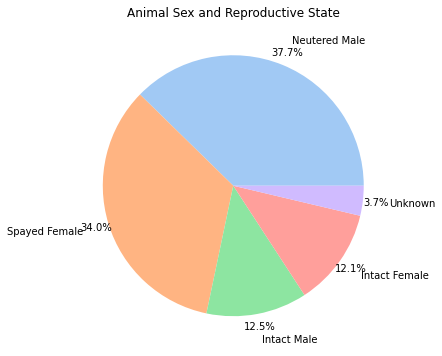

In [76]:
so_df = aac_df.groupby(['sex_upon_outcome'])[['count']].sum().sort_values(by='count', ascending=False)
plt.figure(figsize=(6,6))
plt.pie(so_df['count'], labels=so_df.index, colors=sns.color_palette("pastel",len(so_df.index)), autopct='%1.1f%%', pctdistance=1.1, labeldistance=1.2)
p = plt.gcf()
plt.title('Animal Sex and Reproductive State');
plt.show()

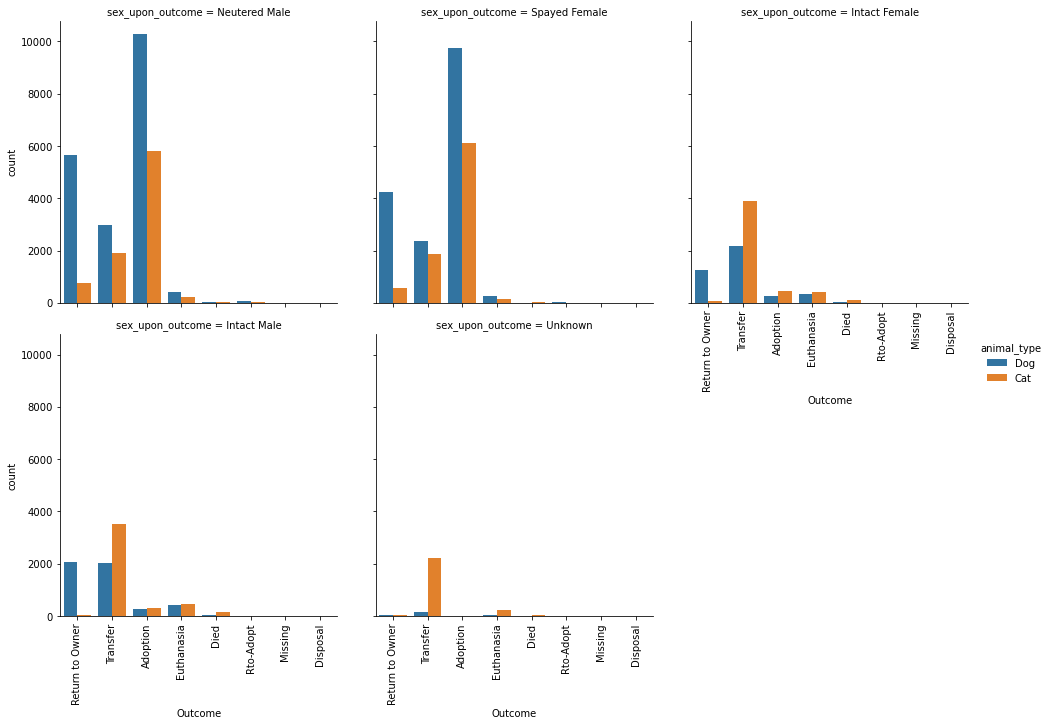

In [71]:
g = sns.catplot(x='outcome_type', hue='animal_type', col='sex_upon_outcome', 
               col_wrap=3, data=aac_df, kind='count', height=4.5)

g.set_xticklabels(rotation=90)
g.set_xlabels('Outcome')

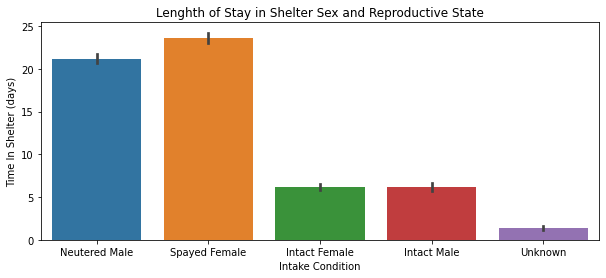

In [73]:
plt.figure(figsize=(10,4))
sns.barplot(x=aac_df['sex_upon_outcome'], y=aac_df['time_in_shelter_days'])
plt.title('Lenghth of Stay in Shelter Sex and Reproductive State');
plt.xlabel('Intake Condition')
plt.ylabel('Time In Shelter (days)');

We can see that outcome has same trends for both male and female animals of the same species, though different for cats and dogs.

Sex and reproductive state of an animal should be split in different columns.

In [78]:
aac_df['sex'] = np.where(aac_df['sex_upon_outcome'].str.contains('Male'), 'Male', 'Female')
aac_df['is_sterilized_upon_outcome'] = np.where(aac_df['sex_upon_outcome'].str.contains('Intact'), 0, 1)

aac_df['sex_intake'] = np.where(aac_df['sex_upon_intake'].str.contains('Male'), 'Male', 'Female')
aac_df['is_sterilized_upon_intake'] = np.where(aac_df['sex_upon_intake'].str.contains('Intact'), 0, 1)

In [79]:
print(len(aac_df[aac_df['sex'] != aac_df['sex_intake']]))

0


In [81]:
aac_df['is_sterilized_in_shelter'] = np.where(aac_df['is_sterilized_upon_intake'] == aac_df['is_sterilized_upon_outcome'], 0, 1)

In [84]:
aac_df.drop(columns=['sex_intake', 'sex_upon_intake', 'sex_upon_outcome', 'is_sterilized_upon_intake'], inplace=True)

In [85]:
aac_df.head()

,animal_id,outcome_type,age_upon_outcome_(days),age_upon_outcome_(years),outcome_datetime,outcome_month,outcome_year,outcome_weekday,dob_year,dob_month,...,intake_datetime,intake_month,intake_year,intake_weekday,intake_number,time_in_shelter_days,age_group,sex,is_sterilized_upon_outcome,is_sterilized_in_shelter
0,A006100,Return to Owner,3650,10.0,2017-12-07 14:07:00,12,2017,Thursday,2007,7,...,2017-12-07 00:00:00,12,2017,Thursday,1.0,0.588194,6-10 years,Male,1,0
1,A006100,Return to Owner,2555,7.0,2014-12-20 16:35:00,12,2014,Saturday,2007,7,...,2014-12-19 10:21:00,12,2014,Friday,2.0,1.259722,6-10 years,Male,1,0
2,A006100,Return to Owner,2190,6.0,2014-03-08 17:10:00,3,2014,Saturday,2007,7,...,2014-03-07 14:26:00,3,2014,Friday,3.0,1.113889,6-10 years,Male,1,0
3,A047759,Transfer,3650,10.0,2014-04-07 15:12:00,4,2014,Monday,2004,4,...,2014-04-02 15:55:00,4,2014,Wednesday,1.0,4.970139,6-10 years,Male,1,0
4,A134067,Return to Owner,5840,16.0,2013-11-16 11:54:00,11,2013,Saturday,1997,10,...,2013-11-16 09:02:00,11,2013,Saturday,1.0,0.119444,10+ years,Male,1,0


## Time period trends

In [67]:
#columns that are not of interest or duplicated
aac_df.drop(columns=['outcome_hour', 'intake_hour', 'intake_monthyear', 'outcome_monthyear', 'dob_monthyear'], inplace=True)

### Weekday

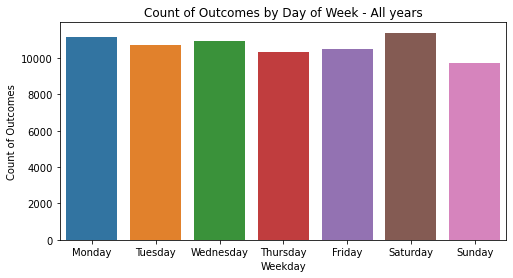

In [100]:
aac_df['intake_weekday'] = pd.Categorical(aac_df['intake_weekday'], ordered=True,
                                      categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.figure(figsize=(8, 4))
sns.countplot(x='intake_weekday', data=aac_df, orient='v')
plt.title('Count of Outcomes by Day of Week - All years')
plt.xlabel('Weekday')
plt.ylabel('Count of Outcomes')
plt.xticks()
plt.yticks();

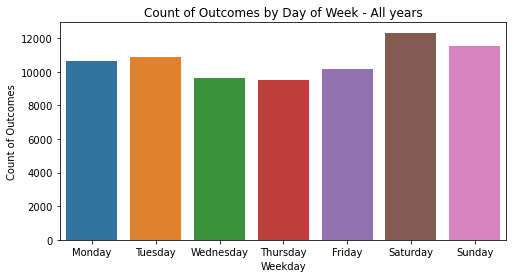

In [101]:
aac_df['outcome_weekday'] = pd.Categorical(aac_df['outcome_weekday'], ordered=True,
                                      categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.figure(figsize=(8, 4))
sns.countplot(x='outcome_weekday', data=aac_df, orient='v')
plt.title('Count of Outcomes by Day of Week - All years')
plt.xlabel('Weekday')
plt.ylabel('Count of Outcomes')
plt.xticks()
plt.yticks();

We can see that number of outcomes is slightly larger on Saturdays, but other than that, weekday has no significant impact.

In [102]:
aac_df.drop(columns=['outcome_weekday', 'intake_weekday'], inplace=True)

### Month

<Figure size 432x432 with 0 Axes>

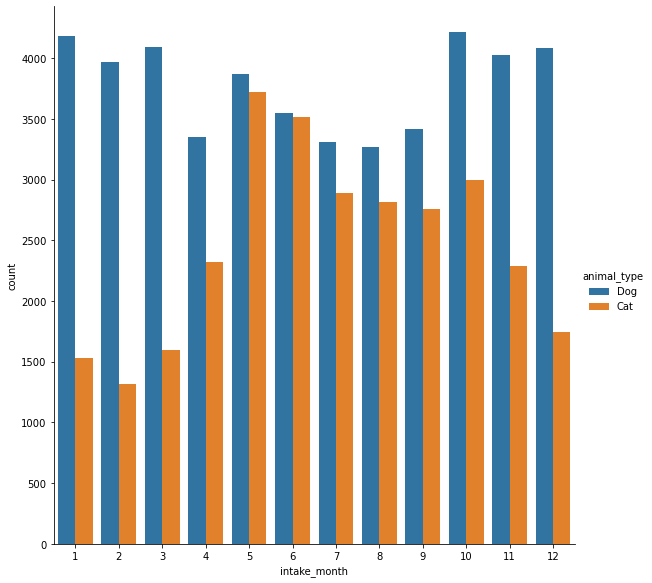

In [92]:
plt.figure(figsize=(6, 6))
sns.catplot(x="intake_month", hue="animal_type", kind="count", data=aac_df, height=8, aspect=1)

<Figure size 432x432 with 0 Axes>

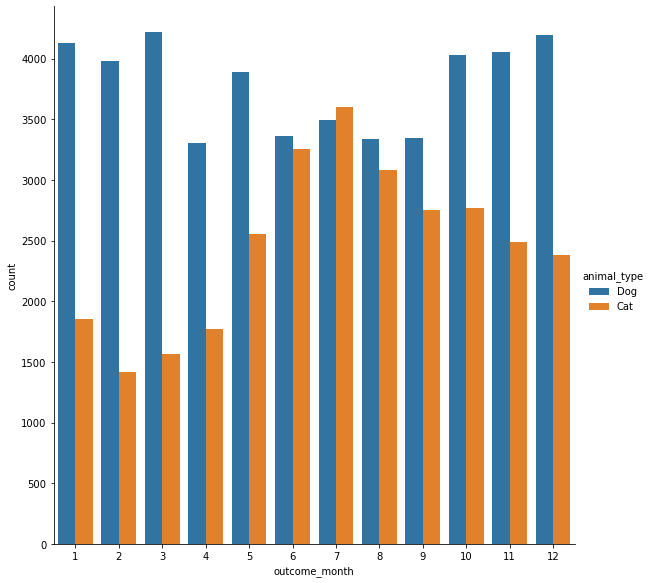

In [94]:
plt.figure(figsize=(6, 6))
sns.catplot(x="outcome_month", hue="animal_type", kind="count", data=aac_df, height=8, aspect=1)

Kitten season May-August? Plot only animals younger than 6 months.

<Figure size 432x432 with 0 Axes>

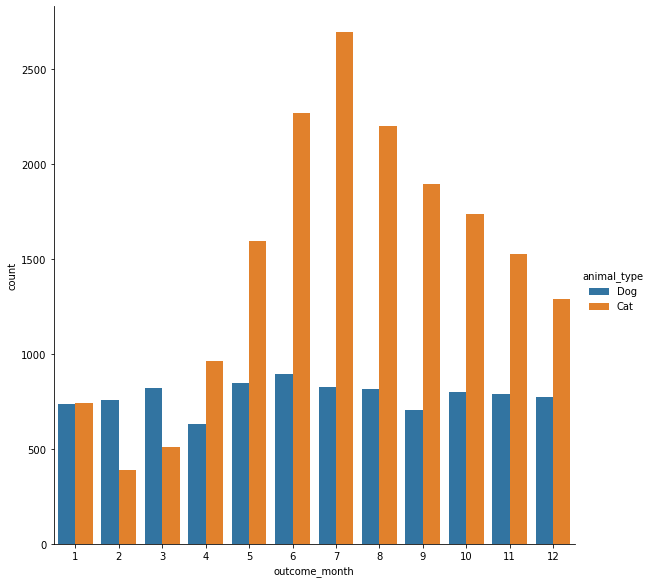

In [109]:
plt.figure(figsize=(6, 6))
sns.catplot(x="outcome_month", hue="animal_type", kind="count", data=aac_df[aac_df['age_upon_outcome_(days)'] <= 180], height=8, aspect=1)

In [ ]:
aac_df.drop(columns=['intake_year', 'intake_datetime', 'dob_month', 'dob_year', 'dob_monthyear'], inplace=True)56


In [ ]:
# remove redudant columns left for plotting purposes
aac_df.drop(columns=["age_upon_intake_(years)", "age_upon_outcome_(years)"], inplace=True)

In [ ]:
print(len(aac_df[aac_df['count'] != 1]))

# remove the helper column - has the same value in every row
aac_df.drop(columns=['count', 'found_location'], inplace=True)